# TASK 2 : Salary Prediction

### Name: Manav Padwal

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("Salary Prediction of Data Professions.csv")
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [ ]:
df.shape

(2639, 13)

In [ ]:
df.dtypes

FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Salary')

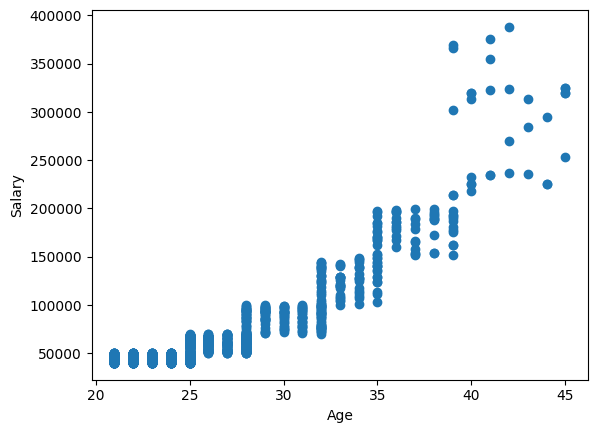

In [ ]:
plt.scatter(df['AGE'],df['SALARY'])
plt.xlabel('Age')
plt.ylabel('Salary')

<Axes: ylabel='SALARY'>

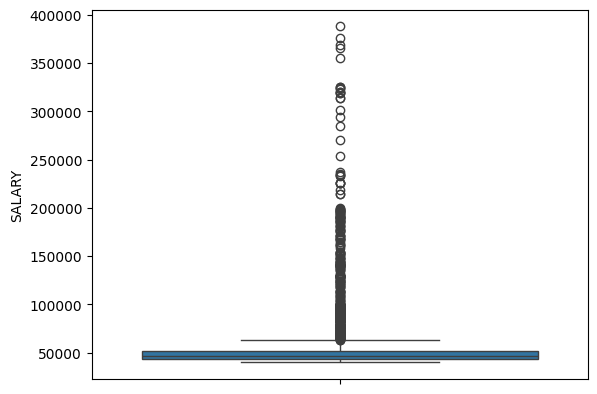

In [ ]:
sns.boxplot(data=df['SALARY'])

# PREPROCESSING
Filing Null values

In [ ]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [ ]:
df['AGE'].fillna(df['AGE'].mean(),inplace=True)
df['LEAVES USED'].fillna(df['LEAVES USED'].median(),inplace=True)
df['LEAVES REMAINING'].fillna(df['LEAVES REMAINING'].mean(),inplace=True)
df['RATINGS'].fillna(df['RATINGS'].median(),inplace=True)

In [ ]:
df['LAST NAME'].fillna("-",inplace=True)
df['DOJ'].fillna(df['DOJ'].mode()[0],inplace=True)

In [ ]:
df['AGE'] = df['AGE'].astype(int)

In [ ]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [ ]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,-,F,10-19-2013,01-07-2016,Associate,24,89207,Web,22.0,13.0,3.0,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,24,43161,Operations,27.0,3.0,3.0,3


# Building MODEL

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Splitting the data into training and testing sets
X = df[['AGE']]
y = df['SALARY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

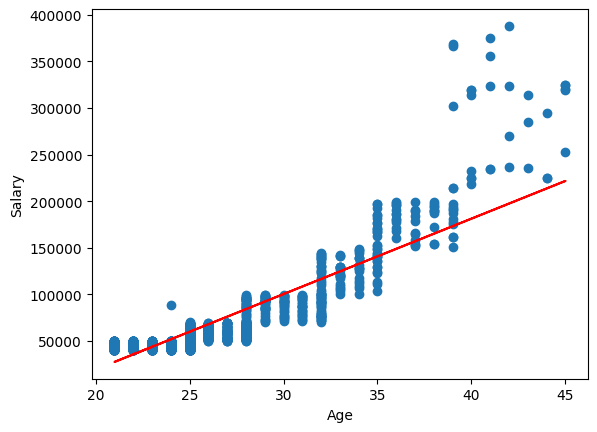

In [ ]:
plt.scatter(df['AGE'],df['SALARY'])
plt.plot(X_train,model.predict(X_train),color='red')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# Evaluating Model

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 13105.105235107367
Mean Squared Error (MSE): 444367053.6454433
Root Mean Squared Error (RMSE): 21080.015503918476
R-squared (R2) Score: 0.732395563242669


# Generate predictions for unseen data

In [ ]:
new_age = 80
predicted_salary = model.predict([[new_age]])
print(f"Predicted salary for age {new_age}: {predicted_salary[0]}")

Predicted salary for age 80: 504949.55497751787


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaBoost = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100, learning_rate=0.1)
adaBoost.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.1,
                  n_estimators=100)

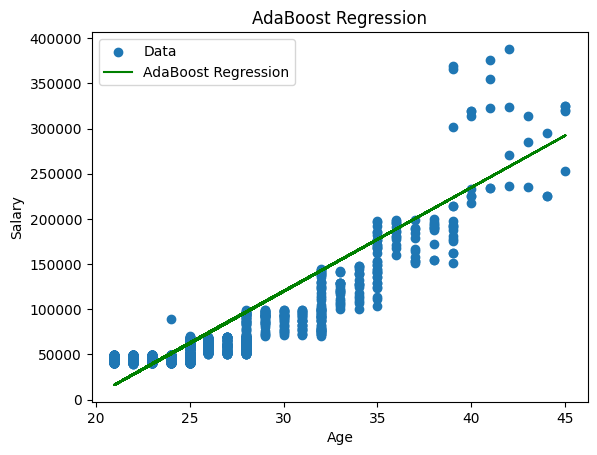

In [ ]:
plt.scatter(df['AGE'], df['SALARY'], label='Data')
plt.plot(X_train, adaBoost.predict(X_train), color='green', label='AdaBoost Regression')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('AdaBoost Regression')
plt.legend()
plt.show()

In [ ]:
y_pred_adaBoost = adaBoost.predict(X_test)
print("AdaBoost Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_adaBoost))
print("MSE:", mean_squared_error(y_test, y_pred_adaBoost))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_adaBoost)))
print("r2 score:", r2_score(y_test, y_pred_adaBoost))

AdaBoost Regression Metrics:
MAE: 17993.14213121439
MSE: 554292487.8809894
RMSE: 23543.41708165978
r2 score: 0.666196834798279


# RECCOMENDATIONS

# Factors affecting Salary

*   The model is trained in such a way that more the age more the salary is being predicted but in real scenario it doesn't works like that
*   Salary Depends on the work experience and the company in which you work
*   So the work experience is been neglected .



# Factors which can improve earnings in data profession :

* Considering years of experience of the candidate

* This can help achieve a much better salary than a salary expected on basis of Age
* Following trends and patterns in data profession to get to know about latest updates in job professions
